## **Task_3**
# Prediction using Decision Tree Algorithm

### *By PRUDVIRAJ AARETI*




In [2]:
# Importing the required libraries
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Loading the iris dataset 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/My Drive/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Removing The 'Id' column

In [5]:
data = data.drop(columns=['Id'],axis=1)

Null values in dataset :  0 



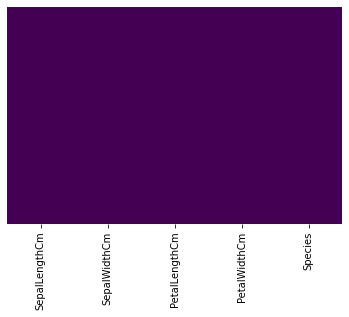

In [13]:
# checking for null values in dataset
print("Null values in dataset : ", data.isnull().sum().sum(), '\n')

_= sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### **Exploratory Data Analysis**



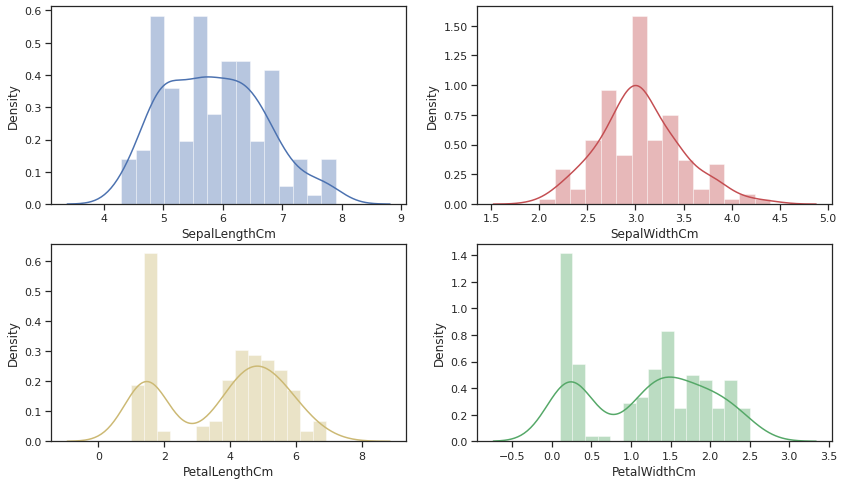

In [4]:
sns.set(style="ticks") 
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.distplot(data['SepalLengthCm'] , color="b", bins=15)
plt.subplot(2,2,2)
sns.distplot(data["SepalWidthCm"], color = "r", bins=15)
plt.subplot(2,2,3)
sns.distplot(data["PetalLengthCm"], color="y" ,bins=15)
plt.subplot(2,2,4)
sns.distplot(data["PetalWidthCm"], color="g", bins=15)
plt.show()

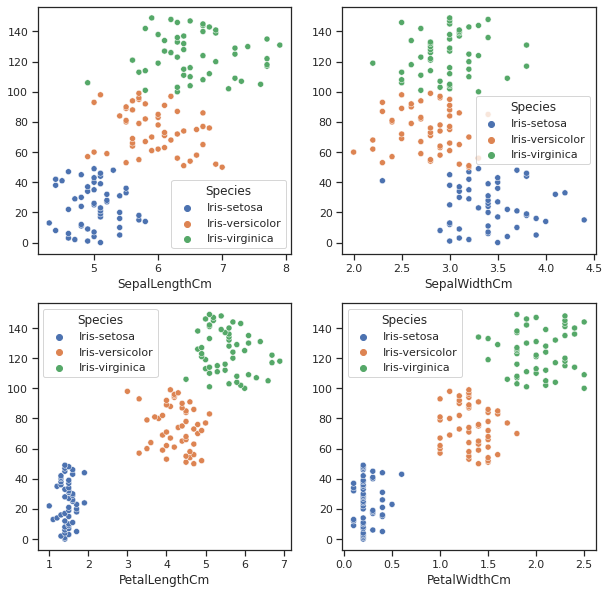

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.scatterplot(data['SepalLengthCm'],data.index,hue = data.Species)
plt.subplot(2,2,2)
sns.scatterplot(data['SepalWidthCm'],data.index,hue = data.Species)
plt.subplot(2,2,3)
sns.scatterplot(data['PetalLengthCm'],data.index,hue = data.Species)
plt.subplot(2,2,4)
sns.scatterplot(data['PetalWidthCm'],data.index,hue = data.Species)
plt.show()

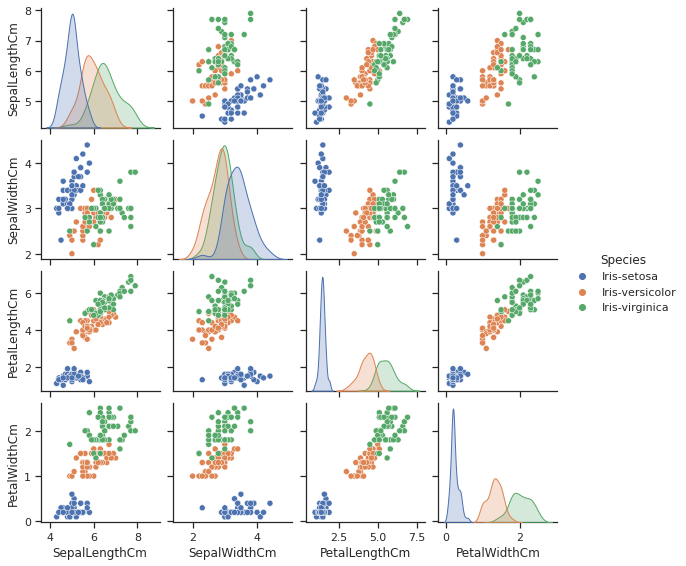

In [6]:
_= sns.pairplot(data, hue = "Species", height = 2)

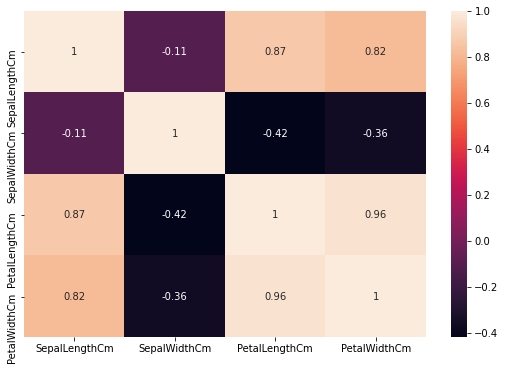

In [60]:
plt.figure(figsize=(9,6))
_= sns.heatmap(data.corr(), annot=True)

### **Separating the Features and Target variables**

In [20]:
X = data.drop(columns=['Species'],axis=1)   # Features
y = data['Species']                         # Target  variable

#  Splitting data into train and test

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [24]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


##  Building a Model ( Decision Tree Algorithm)

In [25]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

# Hyperparameter Tuning with different values

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random'],
    'max_leaf_nodes':[10,20,50,100],
    
}

## Grid Search

In [26]:
#https://scikit-learn.org/stable/modules/grid_search.html#tips-for-parameter-search

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=DT,
                           param_grid=grid_param,
                           cv=5,
                           n_jobs =-1)

In [27]:
grid_search.fit(X_train,y_train)

best_parameters = grid_search.best_params_
print(" Best Parameters are :  ",best_parameters)

 Best Parameters are :   {'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 10, 'min_samples_leaf': 9, 'min_samples_split': 9, 'splitter': 'random'}


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
grid_search.best_score_

0.9833333333333334

## Build a model using best parameters which obtained from Grid Search 

In [51]:
DT = DecisionTreeClassifier(criterion= 'gini', max_depth= 8, max_leaf_nodes = 20, min_samples_leaf= 5, min_samples_split= 9, splitter= 'random')
DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [52]:
y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)

In [53]:
train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)

print("Accuracy for train Data: ", train_acc)
print("Accuracy for test Data : ", test_acc)

Accuracy for train Data:  0.9416666666666667
Accuracy for test Data :  0.9666666666666667


### Confusion Matrix for test data

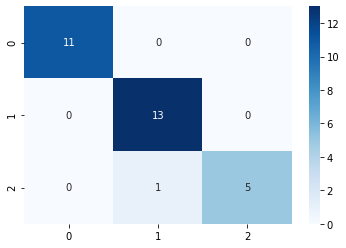

In [54]:
_= sns.heatmap(confusion_matrix(y_test,y_test_pred),annot = True,cmap="Blues")

##  Visualizing the tree

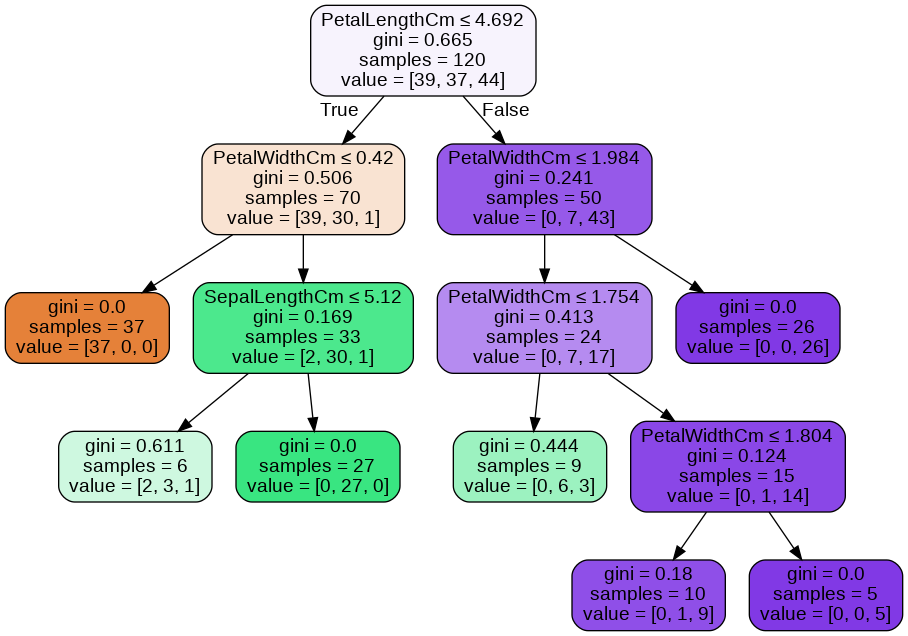

In [55]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())